## About Dataset

This is a set of data created from imaginary data of house prices in an urban environment - Paris
Idea was to create dataset that is good for classification and that gives adequate results.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## Load the Dataset

In [2]:
dataset = pd.read_csv("ParisHousingClass.csv")

In [3]:
dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


## Check for Null Value

In [4]:
dataset.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [5]:
dataset.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category              object
dtype: object

In [6]:
dataset.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [8]:
dataset["category"].value_counts()

category
Basic     8735
Luxury    1265
Name: count, dtype: int64

In [9]:
copied_dataset = dataset.copy()
copied_dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [10]:
copied_dataset["category"]= copied_dataset["category"].replace({"Basic":0,"Luxury":1})

C:\Users\okeya\AppData\Local\Temp\ipykernel_9412\3732895777.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copied_dataset["category"]= copied_dataset["category"].replace({"Basic":0,"Luxury":1})


In [11]:
copied_dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1


### Histogram View of the Dataset

C:\Users\okeya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\okeya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\okeya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\okeya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

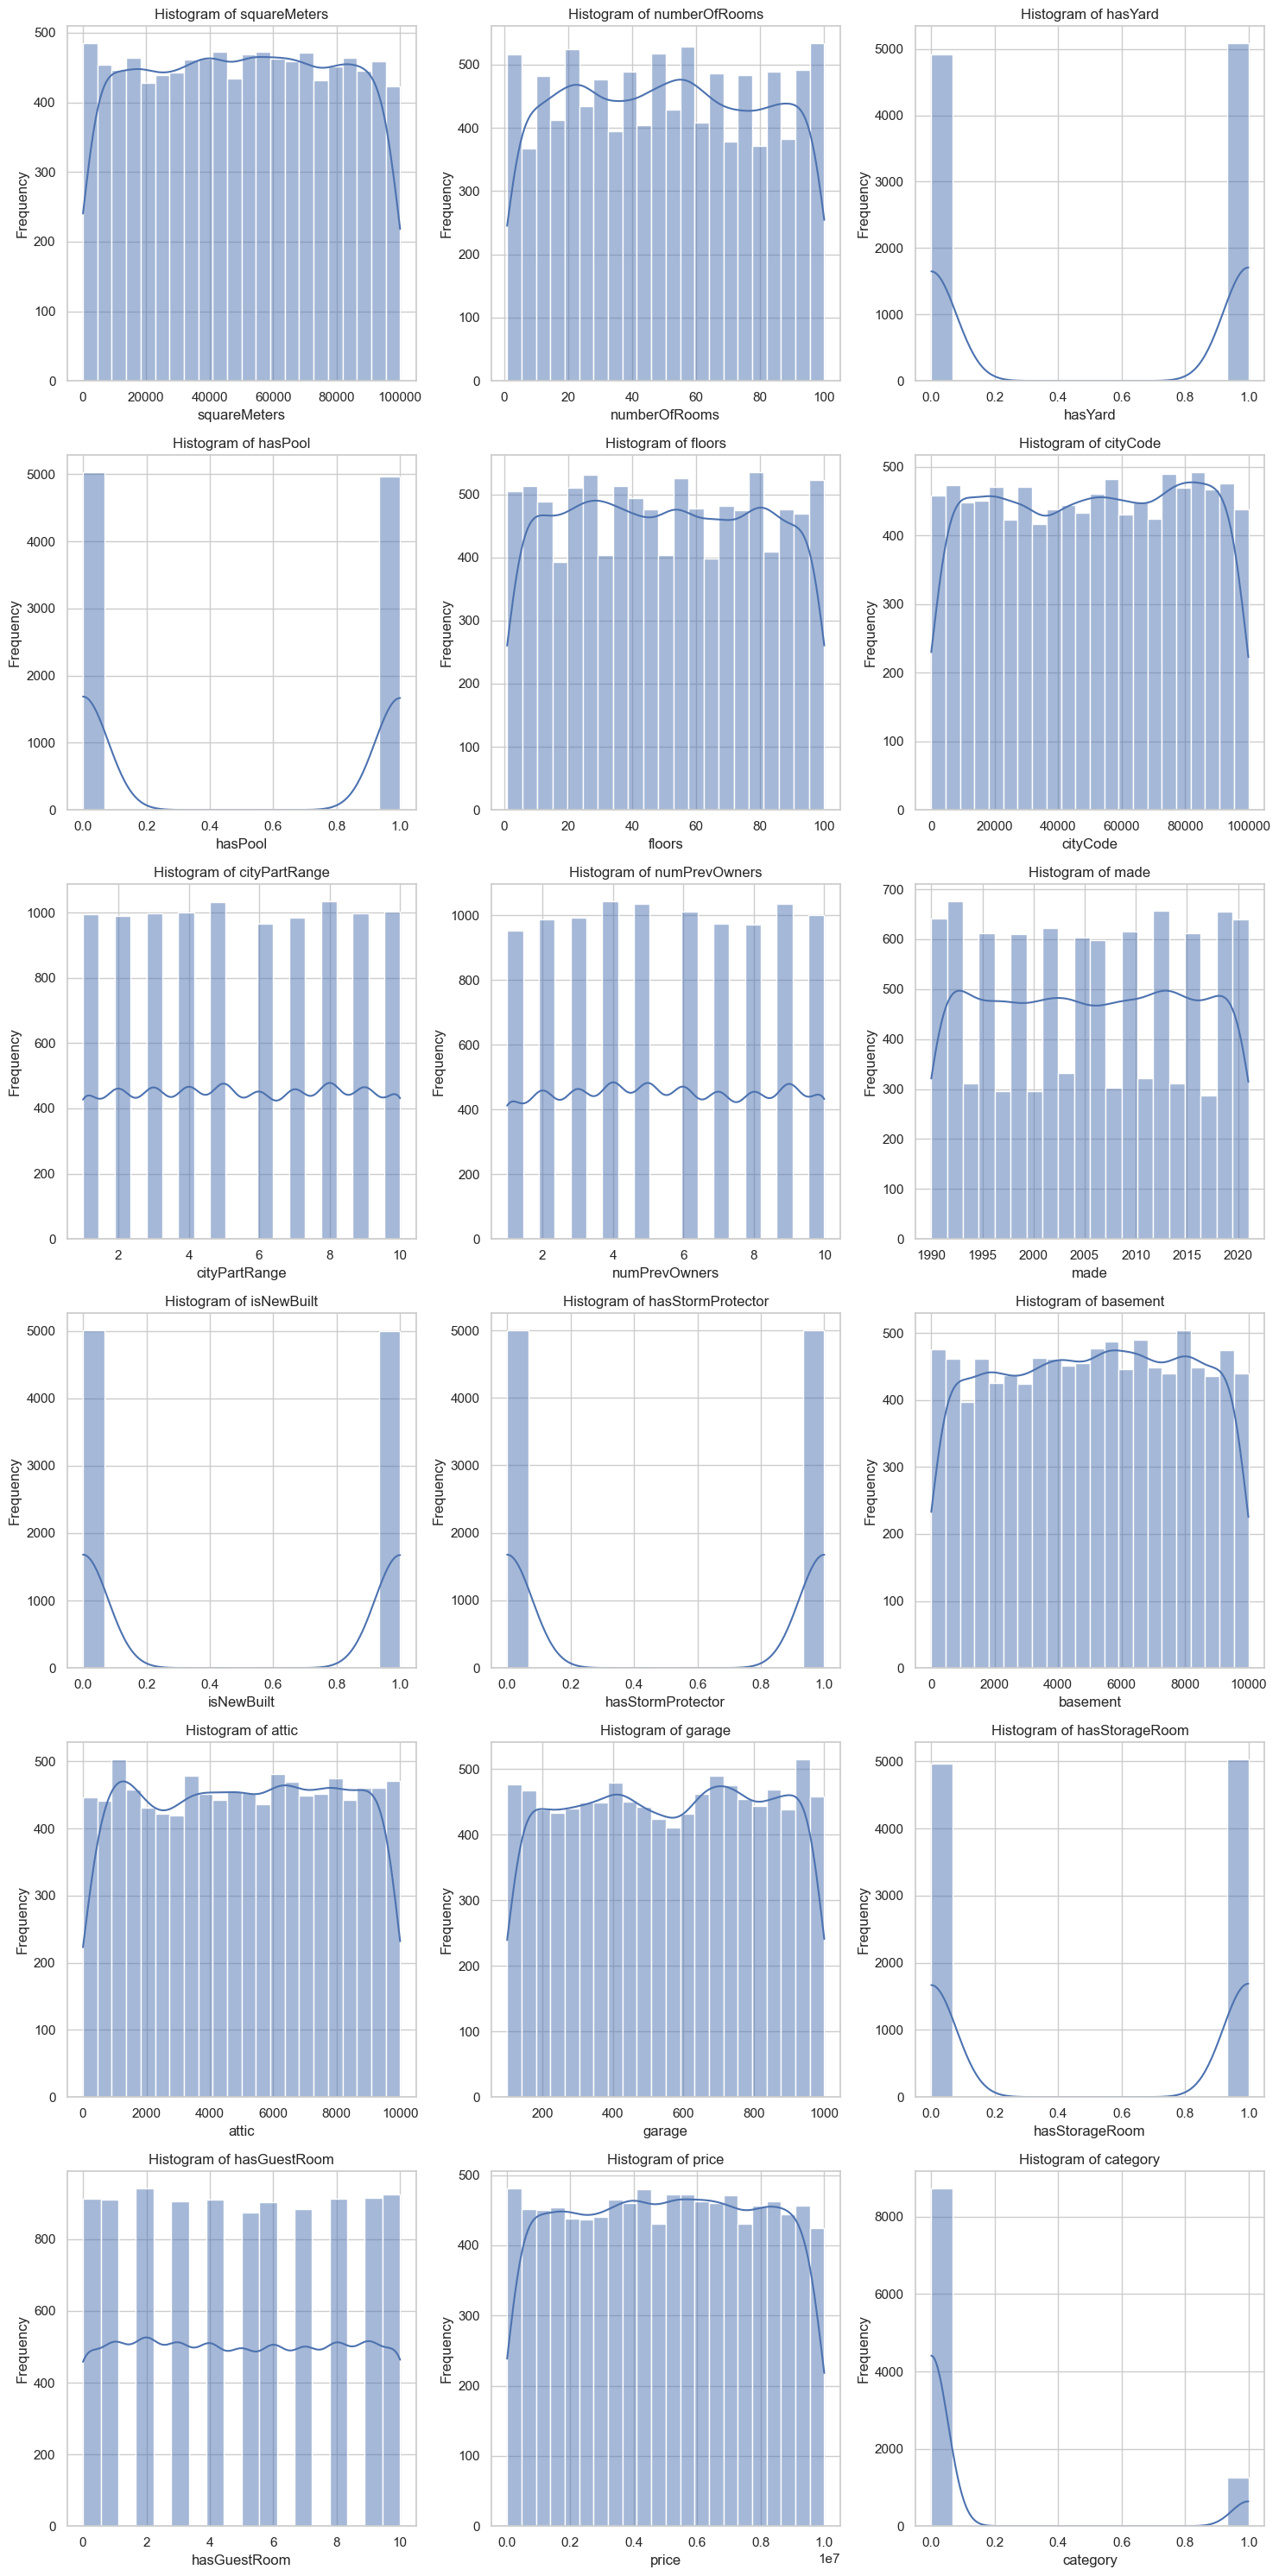

In [12]:
# Set the style
sns.set(style='whitegrid')

# Step 2: Select numeric columns
numeric_columns = copied_dataset.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for subplots
num_rows = len(numeric_columns) // 3 + (1 if len(numeric_columns) % 3 > 0 else 0)
num_cols = min(3, len(numeric_columns))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()


# Plot histograms for each column
for i, column in enumerate(copied_dataset.columns):
    sns.histplot(copied_dataset[column], ax=axes[i], kde=True)
    axes[i].set_title('Histogram of {}'.format(column))
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

C:\Users\okeya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\okeya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\okeya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\okeya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

<Axes: xlabel='squareMeters', ylabel='price'>

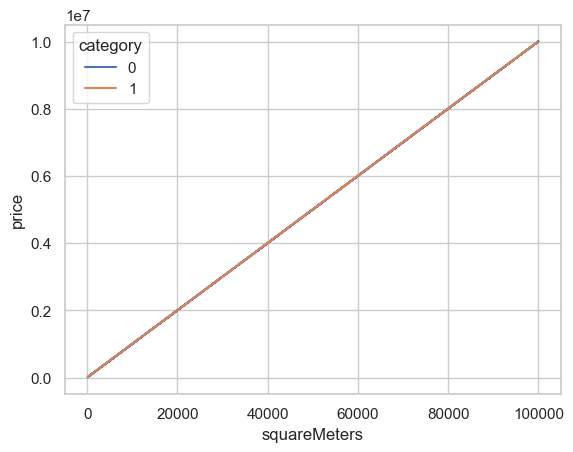

In [13]:
sns.lineplot(x = copied_dataset["squareMeters"], y = copied_dataset["price"] , hue = copied_dataset["category"])

## Splitting of the dataset into X and Y

In [14]:
# Let split the Dataset into X and y
X = copied_dataset.drop(["category","price"],axis=1)
y =copied_dataset["category"]

### Standardization

In [15]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(X)

In [16]:
# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(data_standardized, columns=X.columns)
scaled_df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,0.891562,-1.643518,-1.017554,1.006421,0.440453,-1.408453,-0.874027,0.867593,-0.052484,-0.998202,1.0002,-0.250333,1.374130,1.537488,-1.006018,0.631373
1,1.073956,-0.394180,0.982749,1.006421,1.652041,-0.373880,0.866993,0.167441,1.021904,1.001802,-0.9998,-0.479772,-0.895592,-1.622370,0.994018,-0.942810
2,0.203033,0.265193,-1.017554,1.006421,-1.082685,-0.543643,0.170585,0.867593,1.666537,-0.998202,-0.9998,-0.728678,1.321265,-1.595657,0.994018,1.261046
3,-0.610092,-0.116549,-1.017554,-0.993620,-1.532703,-0.768361,1.563401,-0.532710,0.699588,-0.998202,1.0002,-1.520589,0.730080,-0.740816,-1.006018,-0.627973
4,0.714521,-1.088257,0.982749,1.006421,1.375106,-0.419941,-0.874027,0.517517,-1.664066,1.001802,-0.9998,1.182616,-0.898010,-0.996505,0.994018,-0.313136


In [17]:
scaled_df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-1.167066e-16,-1.122658e-16,-3.552714e-17,-4.973799e-18,3.126388e-17,-6.608047e-17,-1.840306e-16,-1.492140e-17,7.423751e-15,3.339551e-17,-3.801404e-17,-2.327027e-17,1.335820e-16,-1.662670e-16,-5.533352e-17,-7.212009e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.730137e+00,-1.712926e+00,-1.017554e+00,-9.936203e-01,-1.705787e+00,-1.731498e+00,-1.570434e+00,-1.582938e+00,-1.664066e+00,-9.982016e-01,-9.998000e-01,-1.749680e+00,-1.736933e+00,-1.729226e+00,-1.006018e+00,-1.572483e+00
25%,-8.609351e-01,-8.800338e-01,-1.017554e+00,-9.936203e-01,-8.749840e-01,-8.802461e-01,-8.740266e-01,-8.827862e-01,-9.119943e-01,-9.982016e-01,-9.998000e-01,-8.598228e-01,-8.693323e-01,-8.600737e-01,-1.006018e+00,-9.428096e-01
50%,8.180215e-03,-1.243786e-02,9.827488e-01,-9.936203e-01,-9.564616e-03,1.611826e-02,-1.776188e-01,-1.826346e-01,1.235546e-03,-9.982016e-01,-9.998000e-01,2.064812e-02,5.870179e-03,3.353724e-03,9.940179e-01,1.700117e-03
75%,8.598225e-01,8.551581e-01,9.827488e-01,1.006421e+00,8.904716e-01,8.776958e-01,8.669929e-01,8.675929e-01,9.144654e-01,1.001802e+00,1.000200e+00,8.614887e-01,8.681156e-01,8.553324e-01,9.940179e-01,9.462098e-01
max,1.742223e+00,1.722754e+00,9.827488e-01,1.006421e+00,1.721274e+00,1.714433e+00,1.563401e+00,1.567745e+00,1.666537e+00,1.001802e+00,1.000200e+00,1.726664e+00,1.717922e+00,1.705403e+00,9.940179e-01,1.575883e+00


### Heatmap for the Dataset(Unscaled dataset)

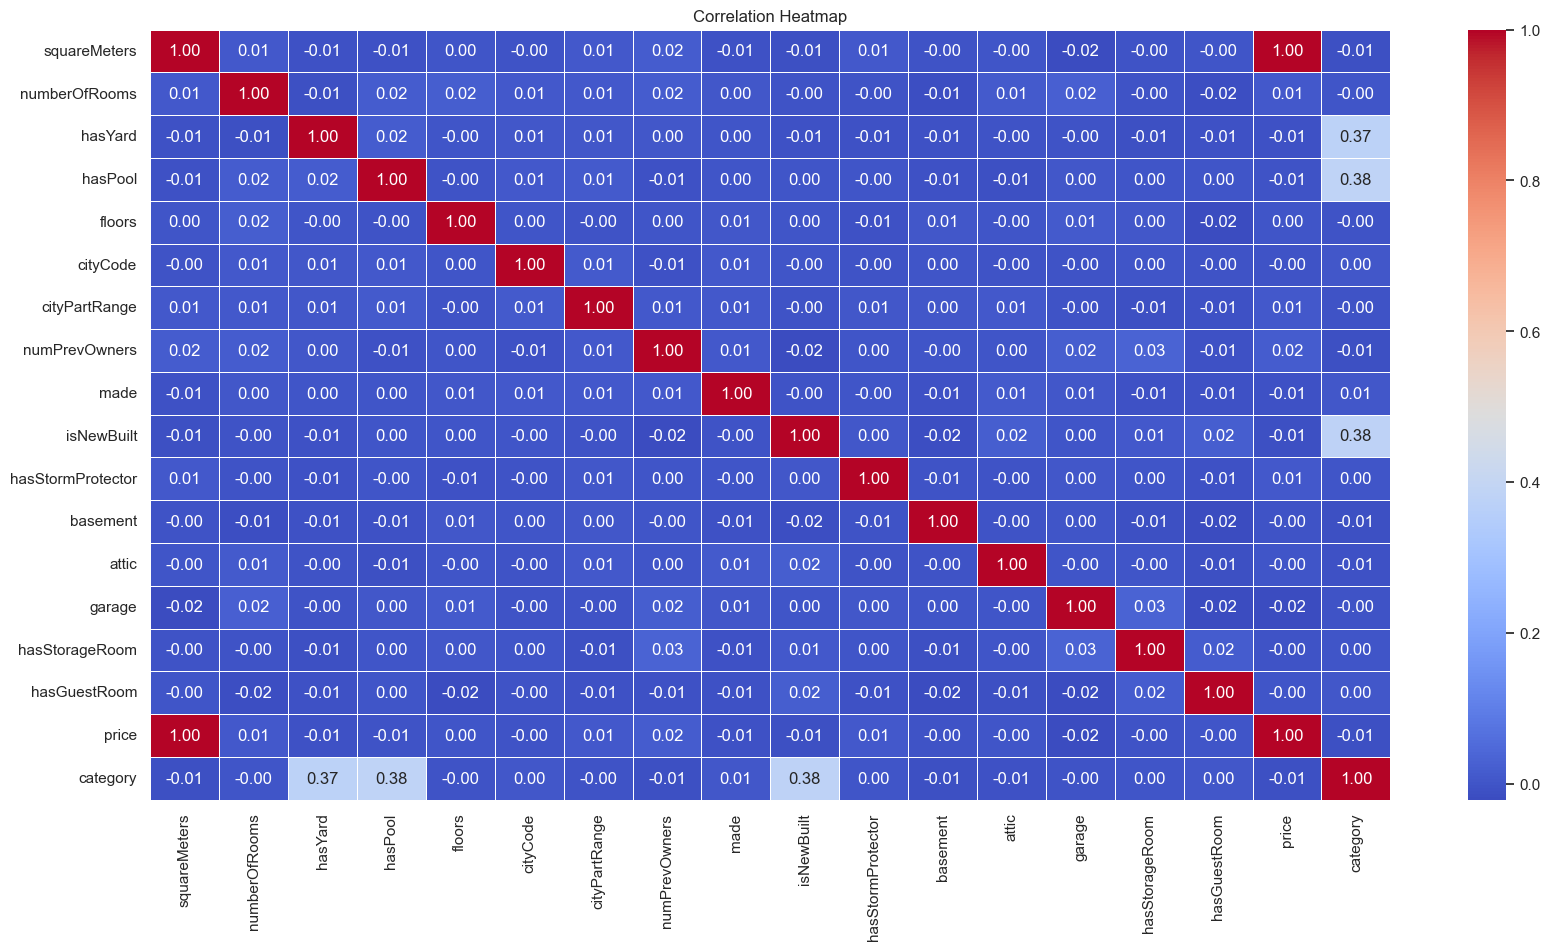

<Figure size 640x480 with 0 Axes>

In [18]:
# Calculate the correlation matrix
correlation_matrix =copied_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#Save the image below
plt.savefig("Correlation Heatmap.png",dpi = 300,bbox_inches ="tight")

### Heatmap for the Scaled Dataset

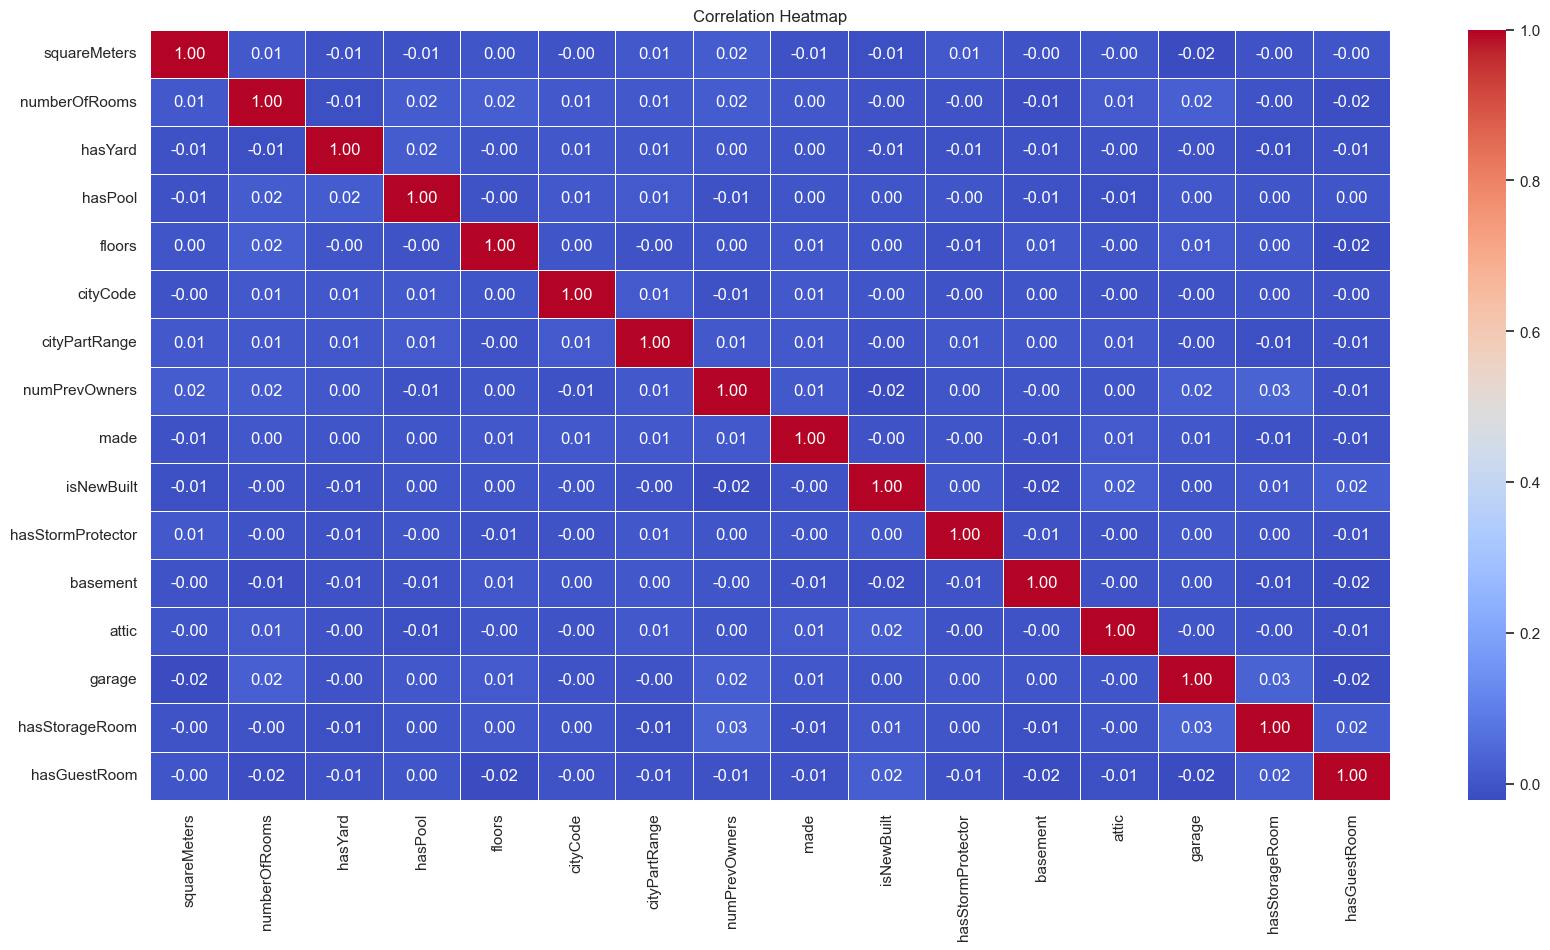

<Figure size 640x480 with 0 Axes>

In [19]:
# Calculate the correlation matrix
correlation_matrix =scaled_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#Save the image below
plt.savefig("Correlation Heatmap.png",dpi = 300,bbox_inches ="tight")

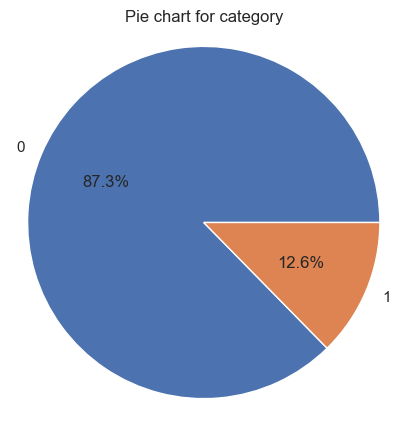

In [20]:
column_to_plot = 'category'
 
# Get the data for the selected column
column_data = copied_dataset[column_to_plot]
 
# Plot a pie chart
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
plt.pie(column_data.value_counts(), labels=column_data.value_counts().index, autopct='%1.1f%%')
plt.title(f'Pie chart for {column_to_plot}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Define functions

In [21]:
def evaluate_preds(y_true,y_preds):
    '''
    Perform evaluation comparison on y_true labels ves y_pred labels on a classification
    '''
    accuracy = accuracy_score(y_true,y_preds) 
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 =f1_score(y_true,y_preds)
    metric_dict = {'accuracy':round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}
    print(f"Accuracy:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
          
    return metric_dict  

### Building Our Model

Here we are going to use four Model to train our dataset

- LogisticRegression
- RandomForestClassifier
- svm
- GaussianNB

### Logistic Regression Model

In [22]:
np.random.seed(42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2)

#Define model
Lr_model= LogisticRegression()


#Fit the model
Lr_model.fit(X_train, y_train)

LogisticRegression()

#### Evaluating our Logistic Regression Model

In [23]:
#Make prediction with the best hyperparameters
Lr_y_preds = Lr_model.predict(X_test)

#Evaluate the prediction
Lr_metrics =evaluate_preds(y_test,Lr_y_preds)

Accuracy:100.00%
Precision:1.00
Recall:1.00
F1 Score: 1.00


#### Visualization of our Logistic Regression Using Confusion metrics

In [24]:
Lr_y_preds =Lr_model.predict(X_test)
 
confusion_matrix(y_test, Lr_y_preds)

array([[1744,    0],
       [   0,  256]], dtype=int64)

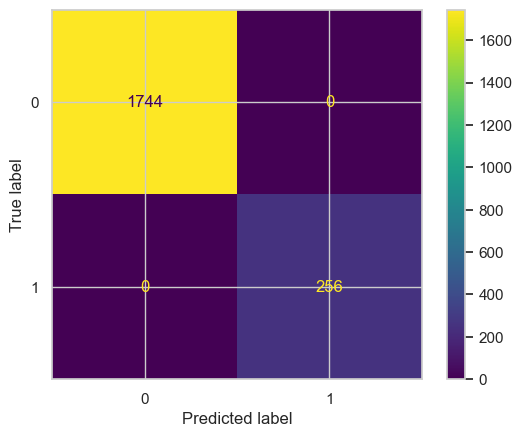

In [25]:
ConfusionMatrixDisplay.from_estimator(estimator =Lr_model , X = X_test, y = y_test);

#### Random Forest Classifier Model

In [26]:
np.random.seed(42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2)

#Define model
Rf_model= RandomForestClassifier()


#Fit the model
Rf_model.fit(X_train, y_train)

RandomForestClassifier()

#### Evaluating our Random Forest Classifier Model

In [27]:
#Make prediction with the best hyperparameters
Rf_y_preds = Rf_model.predict(X_test)

#Evaluate the prediction
Rf_metrics =evaluate_preds(y_test,Rf_y_preds)

Accuracy:100.00%
Precision:1.00
Recall:1.00
F1 Score: 1.00


#### Visualization of the Confusion Metrix for Random Forest

In [28]:
Rf_y_preds =Rf_model.predict(X_test)
 
confusion_matrix(y_test, Rf_y_preds)

array([[1744,    0],
       [   0,  256]], dtype=int64)

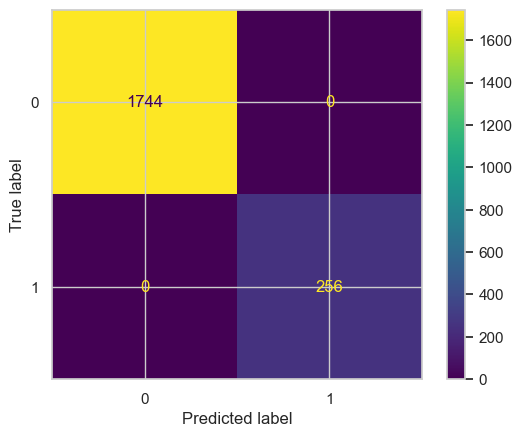

In [29]:
ConfusionMatrixDisplay.from_estimator(estimator =Rf_model , X = X_test, y = y_test);

### SVM Model

In [30]:
np.random.seed(42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2)

#Define model
clf = svm.SVC()

#Fit the model
clf.fit(X_train, y_train)

SVC()

#### Evaluating our SVM Model

In [31]:
#Make prediction with the best hyperparameters
svm_y_preds = clf.predict(X_test)

#Evaluate the prediction
svm_metrics =evaluate_preds(y_test,svm_y_preds)

Accuracy:100.00%
Precision:1.00
Recall:1.00
F1 Score: 1.00


#### Visualization of the Confusion Metrix for SVM

In [32]:
svm_y_preds = clf.predict(X_test)
 
confusion_matrix(y_test, svm_y_preds)

array([[1744,    0],
       [   0,  256]], dtype=int64)

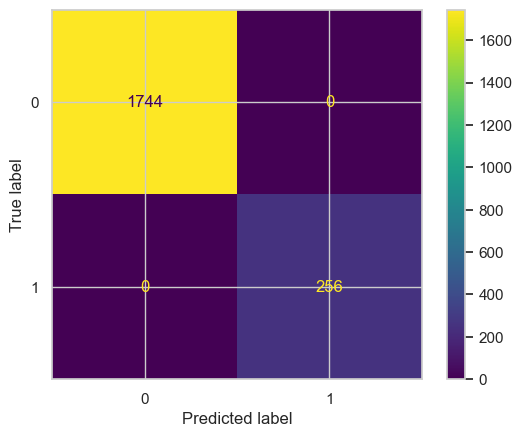

In [33]:
ConfusionMatrixDisplay.from_estimator(estimator =clf , X = X_test, y = y_test);

### Naive bayes Model

In [34]:
np.random.seed(42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()
 
# Train the model
gnb.fit(X_train, y_train)

GaussianNB()

#### Evaluating our Naive Bayes Model

In [35]:
#Make prediction with the best hyperparameters
gnb_y_preds = gnb.predict(X_test)

#Evaluate the prediction
gnb_metrics =evaluate_preds(y_test,gnb_y_preds)

Accuracy:100.00%
Precision:1.00
Recall:1.00
F1 Score: 1.00


#### Visualization of the Confusion Metrix for Naive Bayes Model

In [36]:
gnb_y_preds = gnb.predict(X_test)
 
confusion_matrix(y_test, gnb_y_preds)

array([[1744,    0],
       [   0,  256]], dtype=int64)

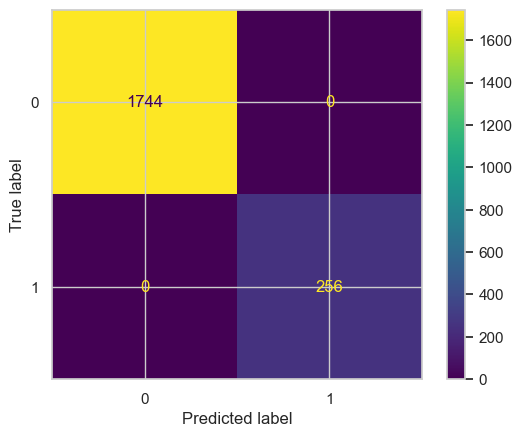

In [37]:
ConfusionMatrixDisplay.from_estimator(estimator =gnb , X = X_test, y = y_test);

In [38]:
Rf_model = RandomForestClassifier()

# Save the model to a file
joblib.dump(model_4, 'RandomForestClassifier_model.pkl')

NameError: name 'model_4' is not defined